# Tutorial

In [1]:
from xgriddedaxis import Remapper
from xgriddedaxis.testing import create_dataset
import xarray as xr
xr.set_options(display_style="html")

## Input Data

For demonstration purposes, we are going to use the `create_dataset()` function for generating test data. 

In [2]:
ds = create_dataset(start='2000-01-01', end='2002-01-01', freq='D', nlats=90, nlons=180)
ds

<xarray.Dataset>
Dimensions:      (d2: 2, lat: 90, lon: 180, time: 731)
Coordinates:
  * time         (time) object 2000-01-01 12:00:00 ... 2001-12-31 12:00:00
  * lat          (lat) float32 -90.0 -87.97753 -85.955055 ... 87.97753 90.0
  * lon          (lon) float32 -180.0 -177.98883 -175.97766 ... 177.98883 180.0
Dimensions without coordinates: d2
Data variables:
    tmin         (time, lat, lon) float32 -5.7140307 1.5822866 ... -1.9858801
    tmax         (time, lat, lon) float32 2.3410757 -0.2836366 ... 3.0907552
    time_bounds  (time, d2) object 2000-01-01 00:00:00 ... 2002-01-01 00:00:00

Our input data set consists of two variables `tmin`, and `tmax` plus the `time_bounds` variable. The data was generated at a daily frequency for two years. 

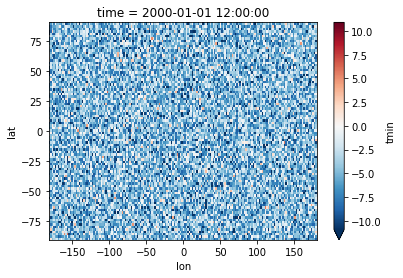

In [3]:
ds.tmin.isel(time=0).plot(robust=True)

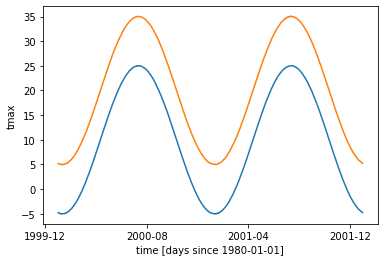

In [4]:
m = ds.mean(dim=['lat', 'lon'])
m.tmin.plot()
m.tmax.plot()

## Remapper Object


Say we want to downsample the input data from `daily` to `monthly` frequency. To achieve this, we create a remapper object, and pass in:

- An xarray Dataset containing the time, time boundary information of the incoming time axis.
- An outgoing frequency. For e.g 'M', '2D', 'H', or '3T' For full specification of available frequencies, please see [here](https://xarray.pydata.org/en/stable/generated/xarray.cftime_range.html)

In [5]:
remapper = Remapper(ds, freq='M')
remapper

During the `Remapper` object creation, `xgriddedaxis` uses the incoming time axis information in conjunction with the specified frequency to construct an outgoing time axis information. This information is stored as an xarray Dataset in the `.info` attribute of the remapper object:

In [6]:
remapper.info

Format,coo
Data Type,float64
Shape,"(24, 731)"
nnz,731
Density,0.041666666666666664
Read-only,True
Size,17.1K
Storage ratio,0.1


The remapper is telling us that it can remap data from a daily time frequency `with 731 incoming timesteps (731 days)` to monthly time frequency with `24 outgoing timesteps (24 months)`.

The remapping weights are stored as a sparse matrix (following the [Coordinate List (COO) layout](https://en.wikipedia.org/wiki/Sparse_matrix#Coordinate_list_(COO))) in the `weights` variable:

In [7]:
remapper.info.weights.data

Format,coo
Data Type,float64
Shape,"(24, 731)"
nnz,731
Density,0.041666666666666664
Read-only,True
Size,17.1K
Storage ratio,0.1


In [8]:
remapper.info.weights.data.todense()

array([[0.03225806, 0.03225806, 0.03225806, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03225806, 0.03225806,
        0.03225806]])

The outgoing time bounds are stored in the `outgoing_time_bounds` variable:

In [9]:
remapper.info.outgoing_time_bounds

<xarray.DataArray 'outgoing_time_bounds' (time: 24, d2: 2)>
array([[cftime.DatetimeGregorian(2000-01-01 00:00:00),
        cftime.DatetimeGregorian(2000-02-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-02-01 00:00:00),
        cftime.DatetimeGregorian(2000-03-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-03-01 00:00:00),
        cftime.DatetimeGregorian(2000-04-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-01 00:00:00),
        cftime.DatetimeGregorian(2000-05-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-05-01 00:00:00),
        cftime.DatetimeGregorian(2000-06-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-06-01 00:00:00),
        cftime.DatetimeGregorian(2000-07-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-01 00:00:00),
        cftime.DatetimeGregorian(2000-08-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-08-01 00:00:00),
        cftime.DatetimeGregorian(2000-09-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-09-01 00:00:00),
        cftime.DatetimeGregorian(2000-10-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-10-01 00:00:00),
        cftime.DatetimeGregorian(2000-11-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-11-01 00:00:00),
        cftime.DatetimeGregorian(2000-12-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-12-01 00:00:00),
        cftime.DatetimeGregorian(2001-01-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-01-01 00:00:00),
        cftime.DatetimeGregorian(2001-02-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-02-01 00:00:00),
        cftime.DatetimeGregorian(2001-03-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-03-01 00:00:00),
        cftime.DatetimeGregorian(2001-04-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-04-01 00:00:00),
        cftime.DatetimeGregorian(2001-05-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-05-01 00:00:00),
        cftime.DatetimeGregorian(2001-06-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-06-01 00:00:00),
        cftime.DatetimeGregorian(2001-07-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-07-01 00:00:00),
        cftime.DatetimeGregorian(2001-08-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-08-01 00:00:00),
        cftime.DatetimeGregorian(2001-09-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-09-01 00:00:00),
        cftime.DatetimeGregorian(2001-10-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-10-01 00:00:00),
        cftime.DatetimeGregorian(2001-11-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-11-01 00:00:00),
        cftime.DatetimeGregorian(2001-12-01 00:00:00)],
       [cftime.DatetimeGregorian(2001-12-01 00:00:00),
        cftime.DatetimeGregorian(2002-01-01 00:00:00)]], dtype=object)
Dimensions without coordinates: time, d2

More information about the incoming and outgoing time axes is stored in the `attrs` section:

In [10]:
remapper.info.attrs

{'freq': '1MS',
 'binding': 'middle',
 'is_time_decoded': True,
 'time_coord_name': 'time',
 'units': 'days since 1980-01-01',
 'calendar': 'standard',
 'time_bounds_varname': 'time_bounds',
 'time_bounds_dim': 'd2',
 'time_bounds_dim_axis_num': 1,
 'use_cftime': True}

## Performing remapping (resampling)

Now that we have an instance of the `Remapper` object, we can tell `xgriddedaxis` to convert data from the incoming time axis to the outgoing (destination) axis. 

In [11]:
tmin_out = remapper.average(ds.tmin)
tmin_out

<xarray.DataArray (time: 24, lat: 90, lon: 180)>
array([[[-4.36668487, -4.90966434, -5.20764445, ..., -4.82228984,
         -5.36773832, -4.85365748],
        [-4.64465407, -5.26058803, -4.2826635 , ..., -5.25600394,
         -4.60422877, -4.19925096],
        [-5.61577497, -4.39924116, -5.14902715, ..., -5.36779499,
         -4.79981068, -5.17719948],
        ...,
        [-4.37548729, -5.75479797, -4.42447138, ..., -5.51524207,
         -4.91552429, -4.79992644],
        [-4.86195157, -4.54825497, -4.19585683, ..., -4.77254283,
         -3.89794025, -5.15403116],
        [-4.63198003, -4.30731833, -4.48182694, ..., -4.68163181,
         -5.68113669, -5.16021869]],

       [[-2.9583573 , -2.07363481, -1.58491242, ..., -2.41169421,
         -2.57656843, -1.74833656],
        [-2.97862639, -1.78319272, -3.34795991, ..., -2.29187622,
         -2.76397821, -2.47569301],
        [-0.94973254, -2.91810883, -1.56681962, ..., -2.58832568,
         -2.68961544, -1.99985678],
        ...,
        [-1.31906329, -2.78634206, -1.34636988, ..., -2.83194594,
         -2.06786154, -1.85599263],
        [-2.48149997, -1.87915557, -1.50438054, ..., -2.04286817,
         -2.6237137 , -1.49300562],
        [-1.83866087, -2.29683715, -3.89922873, ..., -3.20451696,
         -1.80711579, -2.626369  ]],

       [[ 3.17855118,  3.02436   ,  3.23492828, ...,  3.37146396,
          2.89600076,  3.04396332],
        [ 4.21971125,  4.52530477,  3.73769741, ...,  4.02319223,
          4.61977175,  2.43208605],
        [ 4.62121821,  5.00776385,  3.05326029, ...,  3.32271675,
          3.750553  ,  3.16036708],
        ...,
        [ 2.81288641,  3.15293319,  2.99869998, ...,  2.81670499,
          4.82283609,  3.65499183],
        [ 3.68520402,  3.38603891,  3.065089  , ...,  2.9971139 ,
          3.23071192,  2.77869677],
        [ 2.86860574,  3.57489453,  3.11685675, ...,  3.37208047,
          3.03552379,  3.29308861]],

       ...,

       [[ 8.75992036,  8.72540788,  8.72466919, ...,  8.67841707,
          9.23288545,  8.36034149],
        [ 9.46202585,  9.06730876,  9.06141648, ...,  7.56328455,
          9.2889359 ,  8.46496078],
        [ 8.80174891,  9.25442208,  9.79787031, ...,  9.71963816,
          8.06528924,  8.58472173],
        ...,
        [ 8.96141927,  9.24239439,  7.88258178, ...,  9.6063808 ,
          9.11640587,  8.96090051],
        [ 9.016294  ,  8.39264825,  9.32205146, ...,  8.7291917 ,
          9.65142436,  9.09845151],
        [ 9.67681553,  9.06038567,  9.62089692, ...,  8.01842722,
          8.64506153,  8.59594191]],

       [[ 1.29459248,  1.91424183,  2.18210494, ...,  2.21773276,
          1.97480576,  1.2016497 ],
        [ 2.11063694,  2.51704448,  1.62937593, ...,  1.25865028,
          1.88851244,  1.23943784],
        [ 1.63219357,  1.02899677,  2.35940325, ...,  1.28319747,
          2.880127  ,  1.78904342],
        ...,
        [ 1.96749643,  1.64309907,  2.6322243 , ...,  1.56271029,
          1.31844133,  2.74909537],
        [ 1.43859759,  2.82338877,  0.78024527, ...,  1.90483402,
          1.37488454,  2.25761969],
        [ 1.81182605,  1.19726482,  1.67938172, ...,  2.63304159,
          0.83875009,  2.09242452]],

       [[-2.45014807, -3.13857309, -2.75144482, ..., -3.59052821,
         -3.37713729, -2.91299803],
        [-3.38746119, -3.2664174 , -3.09458519, ..., -3.24771264,
         -2.64735307, -3.04651385],
        [-3.15627345, -3.22568353, -2.59973064, ..., -3.26036465,
         -2.60093874, -2.86020454],
        ...,
        [-2.40250784, -3.56385689, -3.29517106, ..., -3.27836361,
         -3.42923709, -2.8449077 ],
        [-3.7372309 , -2.82696382, -3.24887282, ..., -3.47204632,
         -2.65567306, -2.88965615],
        [-4.20234975, -3.17367239, -4.08763882, ..., -3.9455038 ,
         -3.28987531, -2.99596953]]])
Coordinates:
  * time     (time) object 2000-01-16 12:00:00 ... 2001-12-16 12:00:00
  * lat      (lat) float32 -90.0 -87.97753 -85.955055 ... 87.97753 90.0
  * lon      (lon) f

## Check results

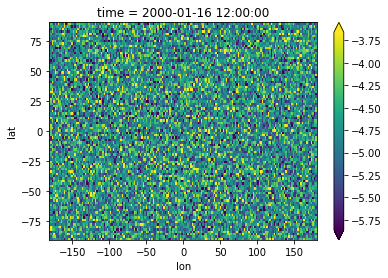

In [12]:
tmin_out.isel(time=0).plot(robust=True)

## Check broadcasting over extra dimensions

The remapping should affect the time dimension **only**. We can check that `xgriddedaxis` tracks coordinate values over extra dimensions

In [13]:
ds.lat

<xarray.DataArray 'lat' (lat: 90)>
array([-90.      , -87.97753 , -85.955055, -83.93259 , -81.91011 , -79.88764 ,
       -77.865166, -75.8427  , -73.82022 , -71.79775 , -69.77528 , -67.75281 ,
       -65.73034 , -63.707867, -61.685394, -59.66292 , -57.64045 , -55.617977,
       -53.595505, -51.573032, -49.55056 , -47.52809 , -45.50562 , -43.483147,
       -41.460674, -39.4382  , -37.41573 , -35.393257, -33.370785, -31.348314,
       -29.325842, -27.303371, -25.2809  , -23.258427, -21.235954, -19.213484,
       -17.191011, -15.168539, -13.146068, -11.123595,  -9.101124,  -7.078652,
        -5.05618 ,  -3.033708,  -1.011236,   1.011236,   3.033708,   5.05618 ,
         7.078652,   9.101124,  11.123595,  13.146068,  15.168539,  17.191011,
        19.213484,  21.235954,  23.258427,  25.2809  ,  27.303371,  29.325842,
        31.348314,  33.370785,  35.393257,  37.41573 ,  39.4382  ,  41.460674,
        43.483147,  45.50562 ,  47.52809 ,  49.55056 ,  51.573032,  53.595505,
        55.617977,  57.64045 ,  59.66292 ,  61.685394,  63.707867,  65.73034 ,
        67.75281 ,  69.77528 ,  71.79775 ,  73.82022 ,  75.8427  ,  77.865166,
        79.88764 ,  81.91011 ,  83.93259 ,  85.955055,  87.97753 ,  90.      ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.97753 -85.955055 ... 87.97753 90.0

In [14]:
# Passes if the output is exactly the same as the input
xr.testing.assert_identical(ds.lat, tmin_out.lat)
xr.testing.assert_identical(ds.lon, tmin_out.lon)

We can plot the time series at a specific location, to make sure the broadcasting is correct:

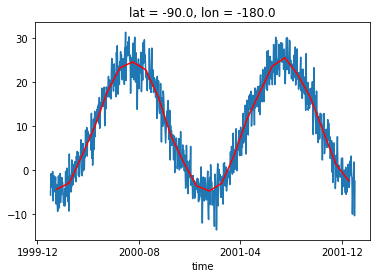

In [15]:
ds.tmin.sel(lat=-90, lon=-180).plot()
tmin_out.sel(lat=-90, lon=-180).plot(color='red')

In [16]:
%load_ext watermark
%watermark -v -m -g -p xarray,xgriddedaxis,cftime,pandas

CPython 3.7.6
IPython 7.12.0

xarray 0.15.0
xgriddedaxis 0.0.post28+dirty
cftime 1.0.4.2
pandas 1.0.1

compiler   : Clang 9.0.1 
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : d1d50db96769995ce8a08da02f543f71c91d9045
